# **#STEP 1: Checking the accuracy of basic models**





In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# Definir la ruta del archivo de Excel
file_path = 'training_data.xlsx'  # Actualiza con la ruta de tu archivo

# Cargar los datos del archivo
data = pd.read_excel(file_path)

# Asegurarse de que las columnas estén correctamente asignadas
df = data[['id', 'sentence', 'difficulty']]

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
train_val_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Dentro del conjunto de entrenamiento, dividir en conjunto de entrenamiento y conjunto de validación (75% entrenamiento, 25% validación)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Guardar los conjuntos de datos en archivos Excel
train_data.to_excel('data/training_data_train.xlsx', index=False)
val_data.to_excel('data/training_data_val.xlsx', index=False)
test_data.to_excel('data/training_data_test.xlsx', index=False)


# Mostrar las primeras filas para verificar
print("Training Data:")
print(train_data.head())
print("\nValidation Data:")
print(val_data.head())
print("\nTest Data:")
print(test_data.head())


Training Data:
            id                                           sentence difficulty
695756  695757  In my country there are some rules of how you ...         B1
449694  449695  I usually go to online store. There are small ...         A1
81601    81602  AME: Miguel castillo AGE:28 AIR COL:Black EE C...         A1
528935  528936  I really into cooking. I often cooking delicio...         A1
351670  351671  Dear friend, I saw the survey and I was in the...         B1

Validation Data:
            id                                           sentence difficulty
106392  106393  Hi! It's my birthday on Saturday, if you are f...         A1
716396  716397  My first boss was a real leader. He was still ...         B2
4722      4723  Hi,teacher, My name is ado du. I work from aft...         A1
690824  690825  I'm going to consult a financial planner so th...         B1
113092  113093  beautiful nilghai nilghai beautiful is season ...         A1

Test Data:
            id                 

##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.metrics import confusion_matrix
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

# Función para calcular métricas y mostrar matriz de confusión
def models_metrics(true_labels, predicted_labels):
    """
    Computes and displays various evaluation metrics for classification models
    and plots a confusion matrix.

    Parameters:
    true_labels (array-like): The true labels of the dataset.
    predicted_labels (array-like): The predicted labels from the model.

    Returns:
    tuple: A tuple containing precision, recall, F1-score, and accuracy.
    """
    # Calculate metrics
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    accuracy = accuracy_score(true_labels, predicted_labels)

    # Confusion Matrix
    conf_mat = confusion_matrix(true_labels, predicted_labels)
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # Display metrics
    print(f"ACCURACY SCORE: {accuracy:.4f}")
    print(f"CLASSIFICATION REPORT:")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1 Score: {f1:.4f}")

    return precision, recall, f1, accuracy

# Example Usage
# precision, recall, f1, accuracy = models_metrics(y_true, y_pred)


# LOGISTIC REGRESSION



In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Cargar los datos desde los archivos Excel
train_data = pd.read_excel('data/training_data_train.xlsx')
val_data = pd.read_excel('data/training_data_val.xlsx')
test_data = pd.read_excel('data/training_data_test.xlsx')

# Mostrar las primeras filas para verificar
print("Training Data:")
print(train_data.head())
print("\nValidation Data:")
print(val_data.head())
print("\nTest Data:")
print(test_data.head())

# Separar características y etiquetas
X_train = train_data['sentence']
y_train = train_data['difficulty']
X_val = val_data['sentence']
y_val = val_data['difficulty']
X_test = test_data['sentence']
y_test = test_data['difficulty']

# Vectorizar las frases
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_vec = vectorizer.transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# Definir el modelo de Regresión Logística
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')

# Definir los hiperparámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_vec, y_train)

# Mostrar los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Evaluar el modelo en el conjunto de validación
val_pred = grid_search.best_estimator_.predict(X_val_vec)
print("Métricas del conjunto de validación:")
print(classification_report(y_val, val_pred))

# Reentrenar el modelo en el conjunto de entrenamiento completo (entrenamiento + validación) con los mejores hiperparámetros
X_train_val_vec = vectorizer.transform(pd.concat([X_train, X_val]))
y_train_val = pd.concat([y_train, y_val])
best_classifier = grid_search.best_estimator_
best_classifier.fit(X_train_val_vec, y_train_val)

# Evaluar el modelo final utilizando el conjunto de prueba
test_pred = best_classifier.predict(X_test_vec)
print("\nMétricas del conjunto de prueba:")
print(classification_report(y_test, test_pred))

# Exportar el modelo y el vectorizador
joblib.dump(best_classifier, 'models/logistic_regression_model.joblib')
joblib.dump(vectorizer, 'models/count_vectorizer.joblib')

print("Modelo y vectorizador exportados correctamente.")


Training Data:
       id                                           sentence difficulty
0  695757  In my country there are some rules of how you ...         B1
1  449695  I usually go to online store. There are small ...         A1
2   81602  AME: Miguel castillo AGE:28 AIR COL:Black EE C...         A1
3  528936  I really into cooking. I often cooking delicio...         A1
4  351671  Dear friend, I saw the survey and I was in the...         B1

Validation Data:
       id                                           sentence difficulty
0  106393  Hi! It's my birthday on Saturday, if you are f...         A1
1  716397  My first boss was a real leader. He was still ...         B2
2    4723  Hi,teacher, My name is ado du. I work from aft...         A1
3  690825  I'm going to consult a financial planner so th...         B1
4  113093  beautiful nilghai nilghai beautiful is season ...         A1

Test Data:
       id                                           sentence difficulty
0   78154  Lilia al

Matriz de confusión del conjunto de validación:
[[67363   607    54     5     0]
 [  979 41798   495    53     2]
 [  113   627 22379   226    17]
 [   19   149   310  7380    79]
 [    1    15    66   121  1799]]


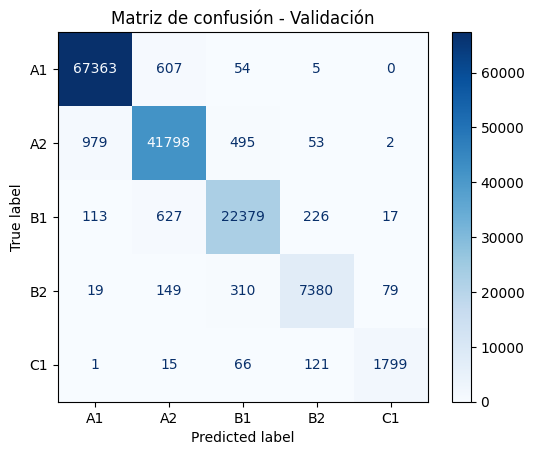

Matriz de confusión del conjunto de prueba:
[[67578   570    71     4     1]
 [  936 41694   487    56     1]
 [  105   538 22306   213    17]
 [   27   140   315  7551    66]
 [    2    10    84   113  1772]]


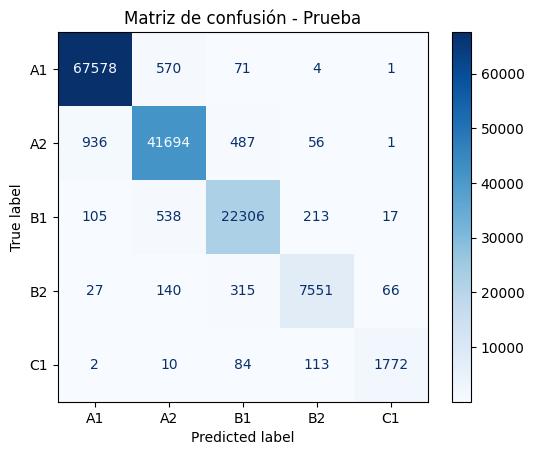

In [18]:

conf_matrix_val = confusion_matrix(y_val, val_pred)
print("Matriz de confusión del conjunto de validación:")
print(conf_matrix_val)

# Visualizar la matriz de confusión para el conjunto de validación
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Validación')
plt.show()

# Matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, test_pred)
print("Matriz de confusión del conjunto de prueba:")
print(conf_matrix_test)

# Visualizar la matriz de confusión para el conjunto de prueba
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=best_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - Prueba')
plt.show()

# K-Nearest Neighbors


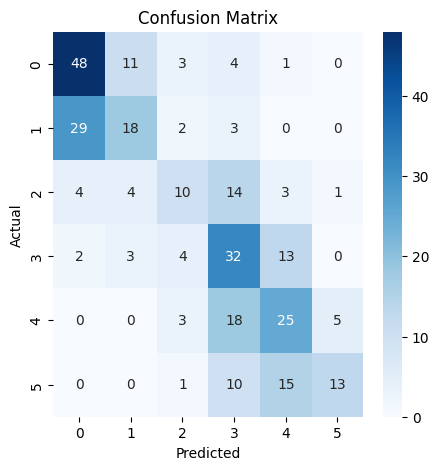

ACCURACY SCORE: 0.4883
CLASSIFICATION REPORT:
	Precision: 0.5043
	Recall: 0.4883
	F1 Score: 0.4784


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
tfidf = TfidfVectorizer(ngram_range=(1,1))
# Create a pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)
y_pred_knn=pipe.predict(X_test)
precision_knn, recall_knn, f1_knn, accuracy_knn = models_metrics(y_test,y_pred_knn)

# Decision Tree

In [19]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_score

tree_depths = range(1,26)
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_train_vec, y_train, tree_depths)
     
max_score = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_score]
best_tree_cv_score = cv_scores_mean[max_score]
best_tree_cv_score_std = cv_scores_std[max_score]
print('The optimal depth - {} trees'.format(best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

The optimal depth - 4 trees


### Setting up the model and its parameters

In [20]:
Tree = DecisionTreeClassifier(max_depth=best_tree_depth, random_state=42)
Tree.fit(X_train_vec, y_train)
tree_pred = Tree.predict(X_test_vec)

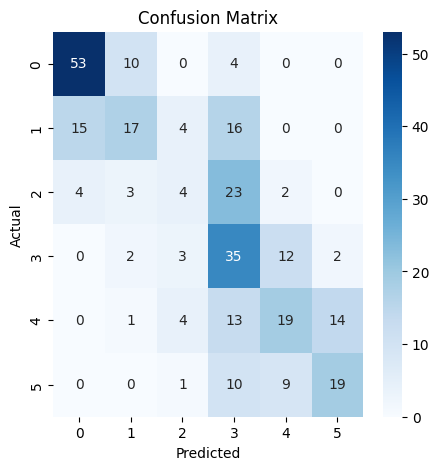

ACCURACY SCORE: 0.4916
CLASSIFICATION REPORT:
	Precision: 0.4952
	Recall: 0.4916
	F1 Score: 0.4772


(np.float64(0.49519415271675277),
 np.float64(0.4916387959866221),
 np.float64(0.47720675651156386),
 0.4916387959866221)

In [21]:
models_metrics(y_test, tree_pred)

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier_rf.fit(X_train_vec,y_train)
y_pred_rf = classifier_rf.predict(X_test_vec)

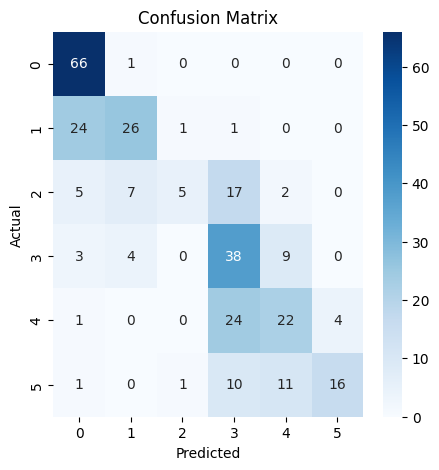

ACCURACY SCORE: 0.5786
CLASSIFICATION REPORT:
	Precision: 0.6188
	Recall: 0.5786
	F1 Score: 0.5507


(np.float64(0.6187733547916615),
 np.float64(0.5785953177257525),
 np.float64(0.5506629307842672),
 0.5785953177257525)

In [23]:


models_metrics(y_test, y_pred_rf)